In [3]:
import numpy as np

import pandas as pd
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

In [6]:
ad_data = pd.read_csv("C:/Users/hp/Downloads/Behavior of the urban traffic of the city of Sao Paulo in Brazil.csv")

In [7]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Hour (Coded)                           135 non-null    int64
 1   Immobilized bus                        135 non-null    int64
 2   Broken Truck                           135 non-null    int64
 3   Vehicle excess                         135 non-null    int64
 4   Accident victim                        135 non-null    int64
 5   Running over                           135 non-null    int64
 6   Fire vehicles                          135 non-null    int64
 7   Occurrence involving freight           135 non-null    int64
 8   Incident involving dangerous freight   135 non-null    int64
 9   Lack of electricity                    135 non-null    int64
 10  Fire                                   135 non-null    int64
 11  Point of flooding               

In [8]:
ad_data.describe()

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
count,135.00000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,14.00000,0.340741,0.874074,0.029630,0.422222,0.118519,0.007407,0.007407,0.007407,0.118519,0.007407,0.118519,0.051852,0.229630,0.044444,0.125926,0.014815,9.622222
std,7.81789,0.659749,1.102437,0.170195,0.696116,0.346665,0.086066,0.086066,0.086066,0.504485,0.086066,0.712907,0.222554,0.818998,0.206848,0.464077,0.121261,4.377464
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,7.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
50%,14.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
75%,21.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
max,27.00000,4.000000,5.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,7.000000,1.000000,8.000000,1.000000,4.000000,1.000000,23.000000


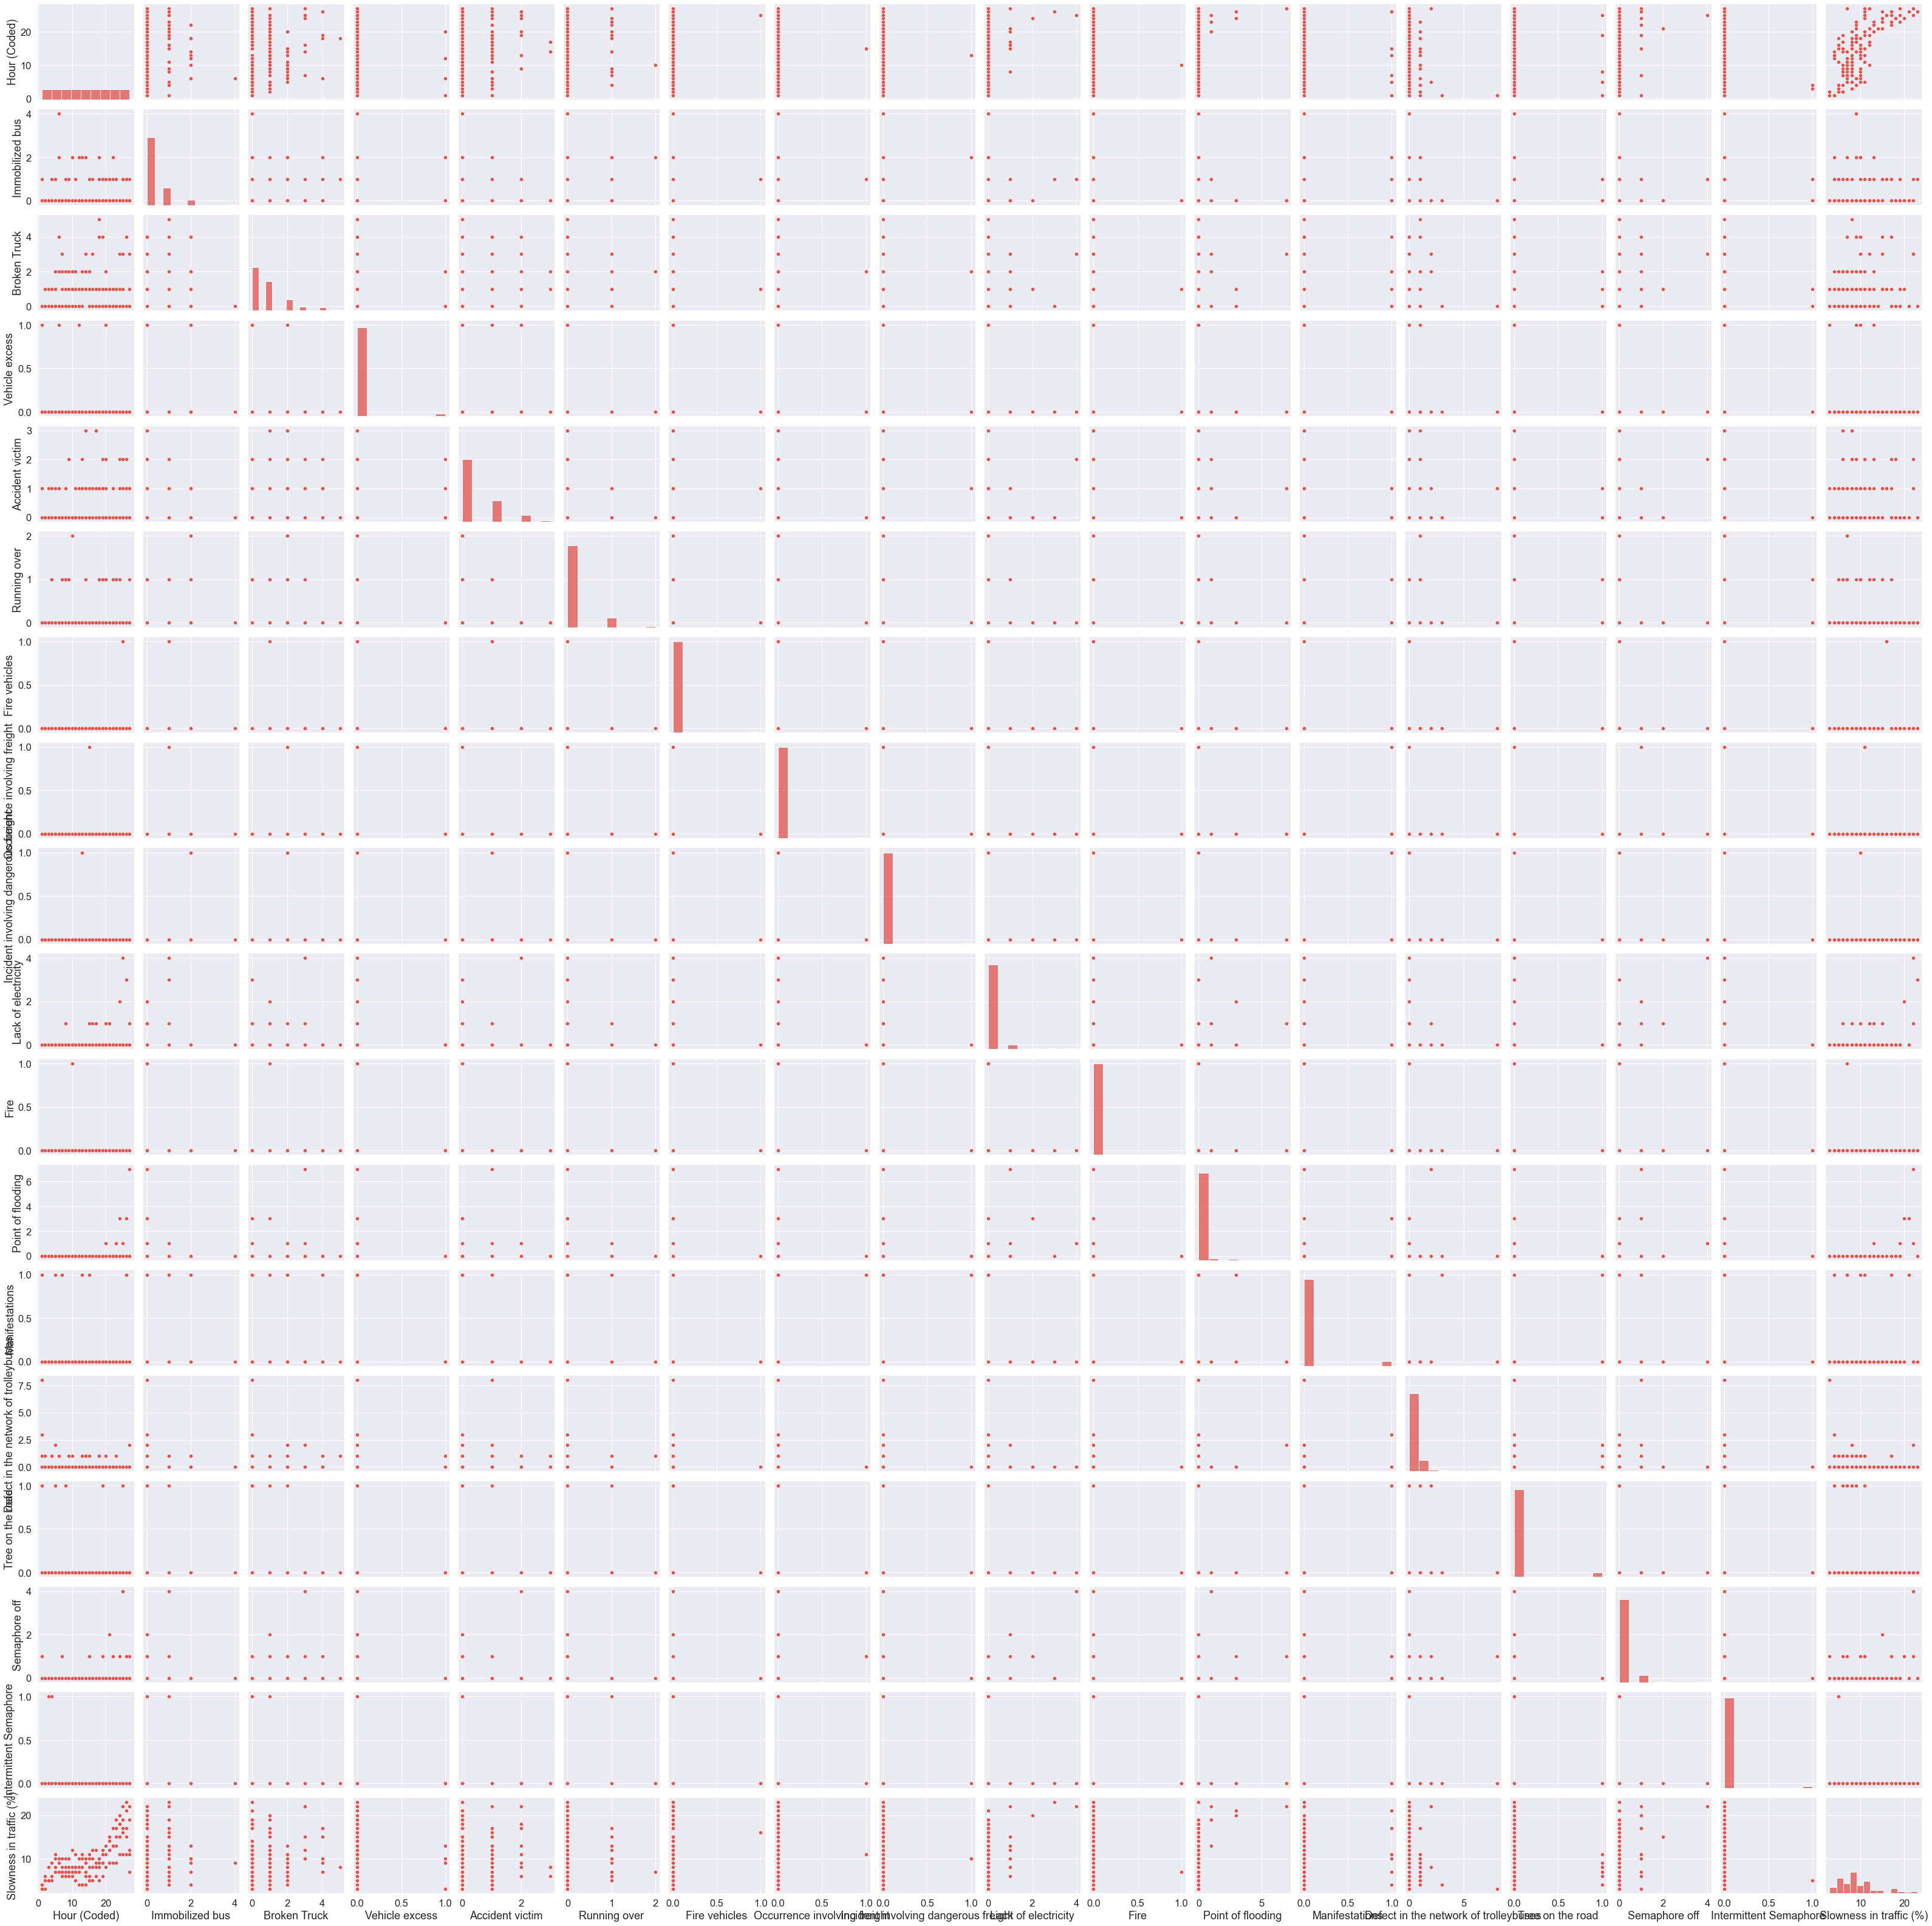

In [9]:
p = sns.pairplot(ad_data)

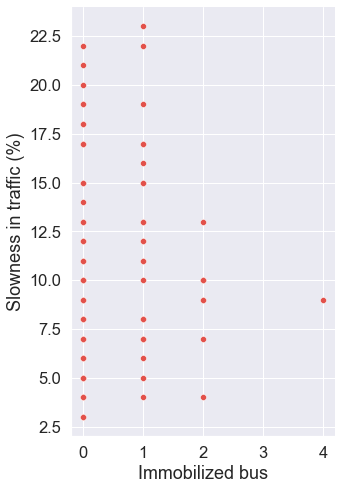

In [10]:
p = sns.pairplot(ad_data, x_vars=['Immobilized bus'], y_vars='Slowness in traffic (%)', size=7, aspect=0.7)

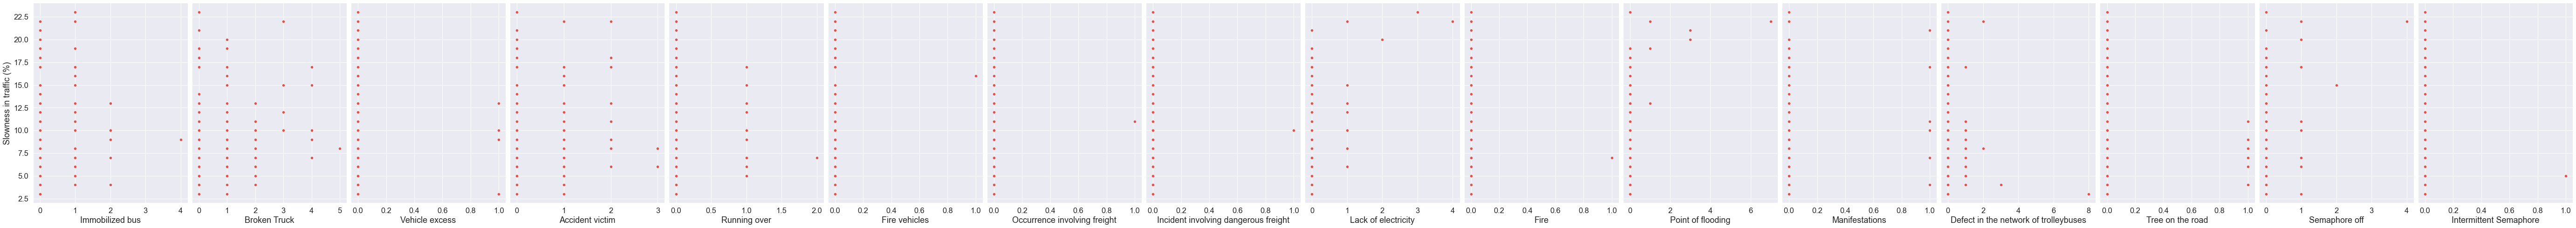

In [15]:
p = sns.pairplot(ad_data, x_vars=['Immobilized bus', 'Broken Truck', 'Vehicle excess', 'Accident victim', 'Running over', 'Fire vehicles', 'Occurrence involving freight', 'Incident involving dangerous freight', 'Lack of electricity', 'Fire', 'Point of flooding', 'Manifestations', 'Defect in the network of trolleybuses', 'Tree on the road',  'Semaphore off', 'Intermittent Semaphore'], y_vars='Slowness in traffic (%)', size=7, aspect=0.7)

In [25]:
# Fitting the linear model
x = ad_data.drop(["Slowness in traffic (%)"],axis=1)
y = ad_data['Slowness in traffic (%)']

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [28]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

In [29]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.6991465813531336


In [30]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))
# Very close to zero so all good here.

Mean of Residuals 9.67323031356572e-17


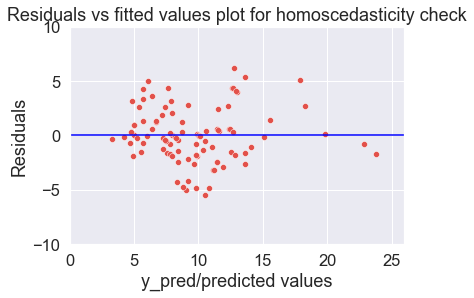

In [31]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [32]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 0.775068523012007), ('p-value', 0.7789664980630993)]

In [33]:
from scipy.stats import bartlett
test = bartlett(X_train[0],residuals)
print(test)

BartlettResult(statistic=15.320942781170098, pvalue=9.070533752381624e-05)


In [34]:
from scipy.stats import bartlett
test = bartlett(X_train[1],residuals)
print(test)

BartlettResult(statistic=32.17754846931691, pvalue=1.4070735612483083e-08)


In [35]:
from scipy.stats import bartlett
test = bartlett(X_train[2],residuals)
print(test)

BartlettResult(statistic=39.18100347562508, pvalue=3.86280358293658e-10)


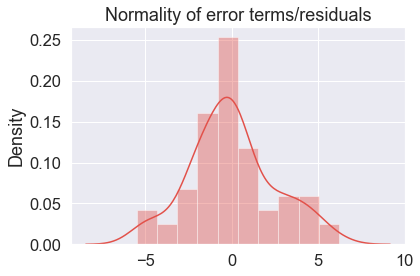

In [36]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

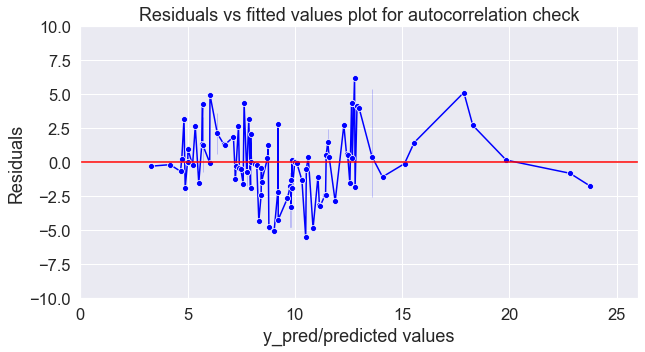

In [37]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

In [38]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)[1])
#Since p value is less than 0.05 we reject the null hypothesis that error terms are not autocorrelated.

0.37843848865697916

In [39]:
import statsmodels.api as sm

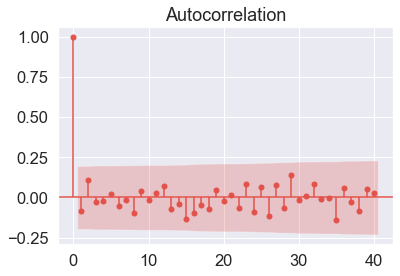

In [40]:
# autocorrelation
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

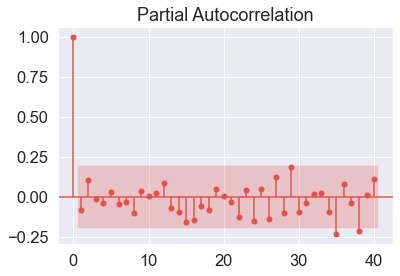

In [41]:
# partial autocorrelation
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

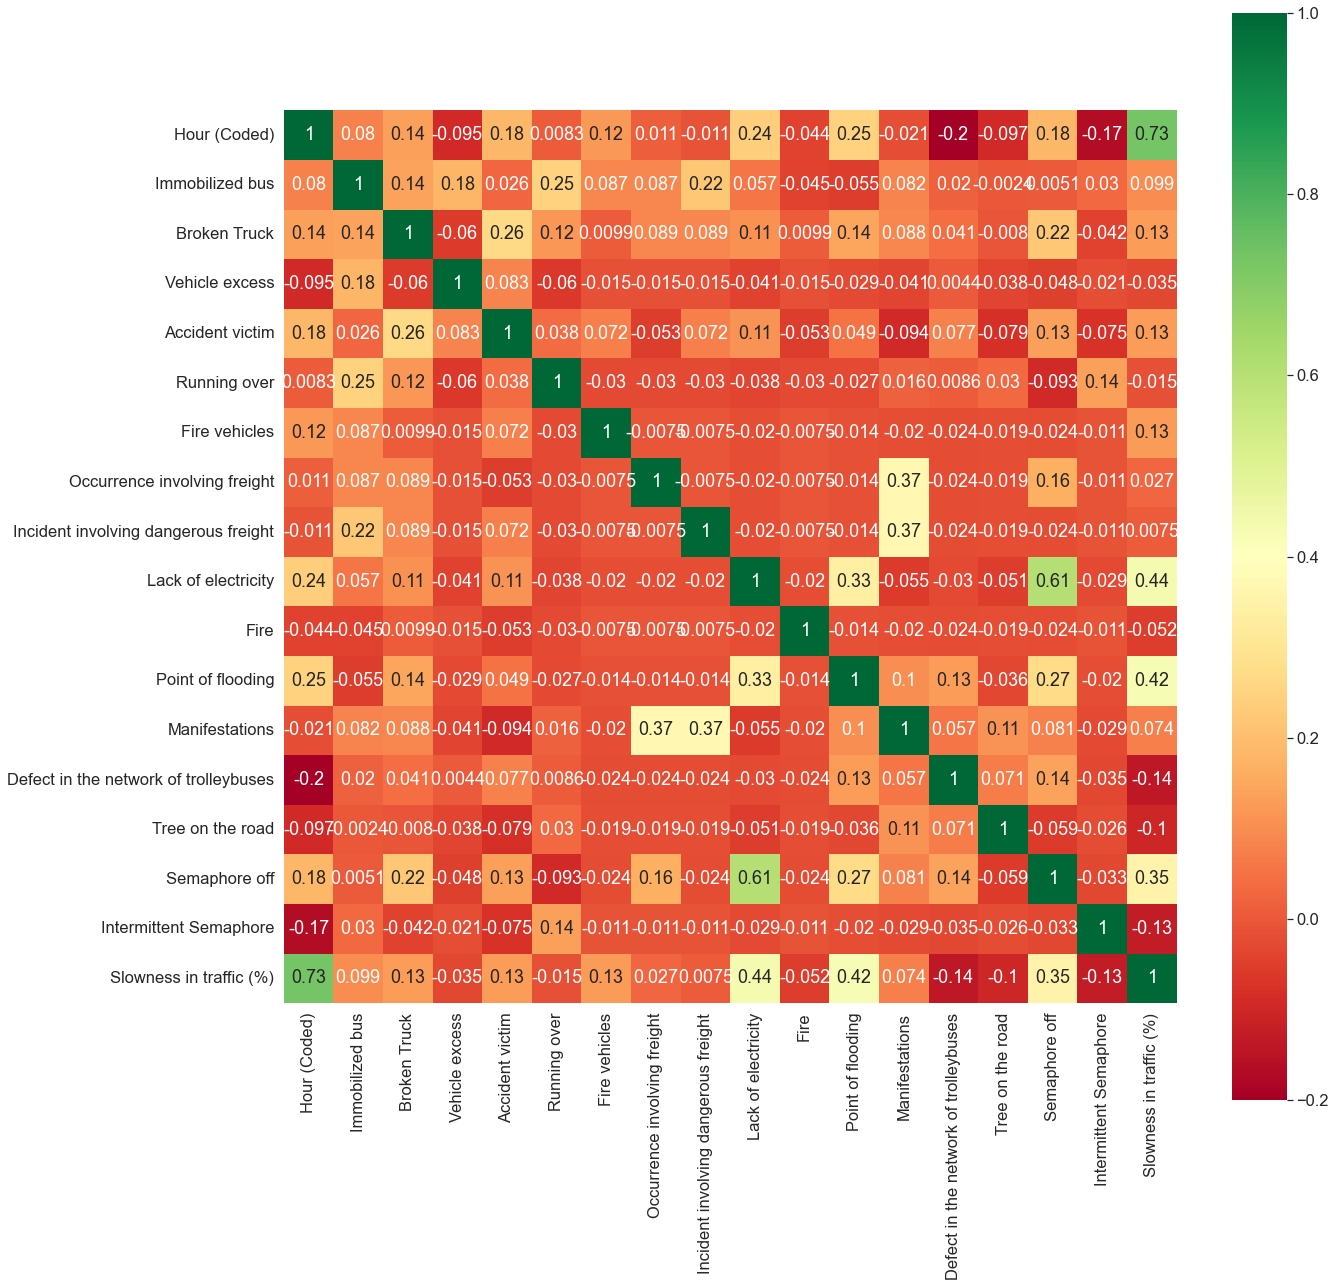

In [42]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(ad_data.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

In [43]:
## Decision Tree

from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(random_state=0)
dec_tree.fit(X_train,y_train)
dec_tree_y_pred = dec_tree.predict(X_train)
print("Accuracy: {}".format(dec_tree.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=dec_tree_y_pred)))

Accuracy: 0.9707572601993149
R squared: 0.9707572601993149


In [44]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor

rf_tree = RandomForestRegressor(random_state=0)
rf_tree.fit(X_train,y_train)
rf_tree_y_pred = rf_tree.predict(X_train)
print("Accuracy: {}".format(rf_tree.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=rf_tree_y_pred)))

Accuracy: 0.9285253297847764
R squared: 0.9285253297847764


In [45]:
# SVM

from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train,y_train)
svr_y_pred = svr.predict(X_train)
print("Accuracy: {}".format(svr.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=svr_y_pred)))

Accuracy: 0.35290013774233897
R squared: 0.35290013774233897
